<a href="https://colab.research.google.com/github/Testeh69/ML_learning/blob/main/learning_ml_magic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

Dataset:
Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.

Donated by:
P. Savicky
Institute of Computer Science, AS of CR
Czech Republic
savicky '@' cs.cas.cz

In [7]:
columns_name = ["fLength", "fWidth", "fSize","fConc", "fConc1", "fAsym", "fM3Long","fM3Trans", "falpha", "fDist","class" ]
df = pd.read_csv("magic04.data", names=columns_name)#  names = assignes a name for the columns
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    falpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g

In [8]:
df["class"].unique() #the method unique determine all the types of data in a particular column
#"""Here we have g and h in unique data but the computers does not understand letters, but understant numbers."""

array(['g', 'h'], dtype=object)

In [9]:
df[df["class"]=="h"].head()

fLength   fWidth   fSize   fConc  fConc1    fAsym  fM3Long  fM3Trans  \
12332   93.7035  37.9432  3.1454  0.1680  0.1011  53.2566  89.0566   11.8175   
12333  102.0005  22.0017  3.3161  0.1064  0.0724 -54.0862  43.0553  -15.0647   
12334  100.2775  21.8784  3.1100  0.3120  0.1446 -48.1834  57.6547   -9.6341   
12335   91.6558  18.8293  2.7097  0.4386  0.3420 -52.6841 -97.8373  -17.0955   
12336   38.0195  12.6736  2.8747  0.4084  0.1928 -51.4840   8.3471    7.9620   

        falpha     fDist class  
12332  14.1224  231.9028     h  
12333  88.4636  274.9392     h  
12334  20.7848  346.4330     h  
12335  63.8834  130.7998     h  
12336  24.5402  163.8674     h

In [10]:
#encoding the letters into numbers so that the computers can understand
df["class"] = (df["class"] =="g").astype(int) #here g = 1 and others values who aren't are equal to 0

"The goal of the exercise is to try to predict if the stars are of class 'g' or 'h'. So this is clearly a classification problem.


We have columns that are called features, and along with those features, we also have the corresponding labels (answers), making it a supervised learning problem."

In [11]:
df[df["class"]==0].head()

fLength   fWidth   fSize   fConc  fConc1    fAsym  fM3Long  fM3Trans  \
12332   93.7035  37.9432  3.1454  0.1680  0.1011  53.2566  89.0566   11.8175   
12333  102.0005  22.0017  3.3161  0.1064  0.0724 -54.0862  43.0553  -15.0647   
12334  100.2775  21.8784  3.1100  0.3120  0.1446 -48.1834  57.6547   -9.6341   
12335   91.6558  18.8293  2.7097  0.4386  0.3420 -52.6841 -97.8373  -17.0955   
12336   38.0195  12.6736  2.8747  0.4084  0.1928 -51.4840   8.3471    7.9620   

        falpha     fDist  class  
12332  14.1224  231.9028      0  
12333  88.4636  274.9392      0  
12334  20.7848  346.4330      0  
12335  63.8834  130.7998      0  
12336  24.5402  163.8674      0

In [ ]:
for label in columns_name[:-1]:
  plt.hist(df[df["class"] == 1][label], color="blue", label="gammma", alpha = 0.7, density = True)
  plt.hist(df[df["class"] == 0][label], color="red", label="hadron", alpha = 0.7, density = True)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

# **Train, Validation ,test datasets**

In [13]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))] )

In [14]:
#We aim to scale the data in such a way that a particular feature does not dominate over the others in terms of importance.

def scale_dataset(data_frame, oversample = False):
  X = data_frame[data_frame.columns[:-1]].values
  y = data_frame[data_frame.columns[-1]].values

  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  if oversample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X,y)

  data = np.hstack((X,np.reshape(y, (-1,1))))

  return data, X, y

In [15]:
print(len(train[train["class"]==1])) #gamma
print(len(train[train["class"]==0])) #hadron

7378
4034


We can see that there is much more value for gamma contrary to the hadron class. This is a problem. We want the dataset of the two to have the same lenght.

In [16]:
train, X_train, y_train = scale_dataset(train,oversample = True)
valid, X_valid, y_valid = scale_dataset(valid, oversample = False)
test, X_test, y_test = scale_dataset(test, oversample = False)

# kNN

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [32]:
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [33]:
y_pred = knn_model.predict(X_test)

In [34]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.68      0.72      1324
           1       0.84      0.89      0.86      2480

    accuracy                           0.82      3804
   macro avg       0.80      0.79      0.79      3804
weighted avg       0.81      0.82      0.81      3804



# NAIVE BAYES

In [38]:
from sklearn.naive_bayes import GaussianNB

In [39]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, y_train)

In [40]:
y_pred = nb_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.42      0.52      1324
           1       0.74      0.90      0.81      2480

    accuracy                           0.73      3804
   macro avg       0.71      0.66      0.67      3804
weighted avg       0.72      0.73      0.71      3804



# LOGISTIC REGRESSION

In [41]:
from sklearn.linear_model import LogisticRegression

In [42]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train, y_train)

In [43]:
y_pred = lg_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.68      0.72      0.70      1324
           1       0.85      0.82      0.83      2480

    accuracy                           0.79      3804
   macro avg       0.76      0.77      0.77      3804
weighted avg       0.79      0.79      0.79      3804



# SVM

In [44]:
from sklearn.svm import SVC

In [45]:
svm_model = SVC()
svm_model = svm_model.fit(X_train , y_train)

In [47]:
y_pred = svm_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.80      0.80      1324
           1       0.89      0.89      0.89      2480

    accuracy                           0.86      3804
   macro avg       0.84      0.84      0.84      3804
weighted avg       0.86      0.86      0.86      3804



# NEURAL NETWORKS

In [48]:
import tensorflow as tf

In [49]:
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)

  plt.show()

In [69]:
def train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size,epochs):#lr stand for learning rates
  nn_model = tf.keras.Sequential([
      tf.keras.layers.Dense(num_nodes, activation = "relu", input_shape=(10,)),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(num_nodes, activation ="relu"),
      tf.keras.layers.Dense(1, activation="sigmoid")

  ])

  nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss="binary_crossentropy", metrics=["accuracy"])
  history = nn_model.fit(X_train, y_train, epochs=epochs, batch_size = batch_size, validation_split=0.2, verbose=0 )
  return nn_model, history

16 nodes, dropout 0, lr 0.1, batch size 32


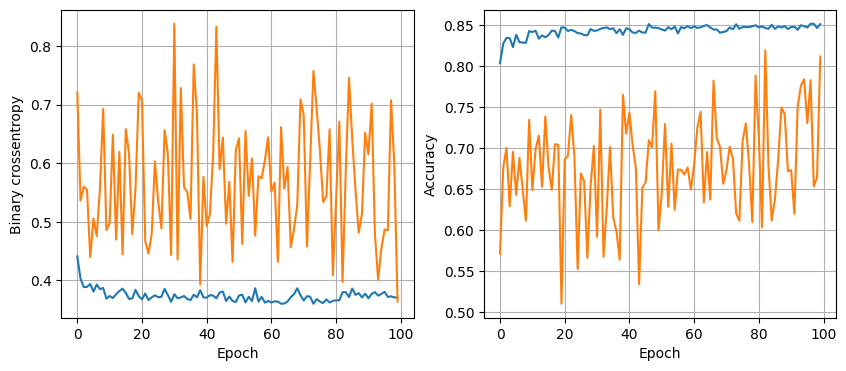

119/119 [==============================] - 0s 2ms/step - loss: 0.4362 - accuracy: 0.8475
16 nodes, dropout 0, lr 0.1, batch size 64


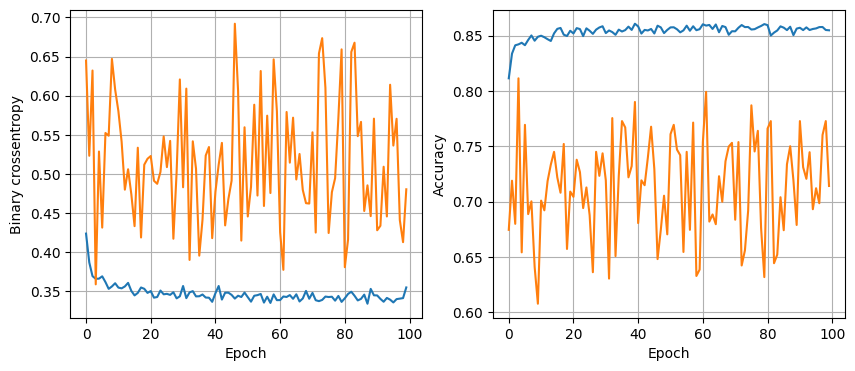

119/119 [==============================] - 0s 1ms/step - loss: 0.3266 - accuracy: 0.8712
16 nodes, dropout 0, lr 0.1, batch size 128


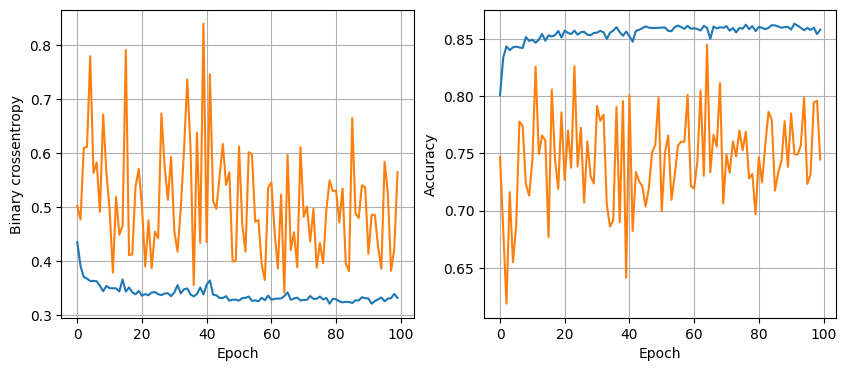

119/119 [==============================] - 0s 2ms/step - loss: 0.3105 - accuracy: 0.8688
16 nodes, dropout 0, lr 0.005, batch size 32


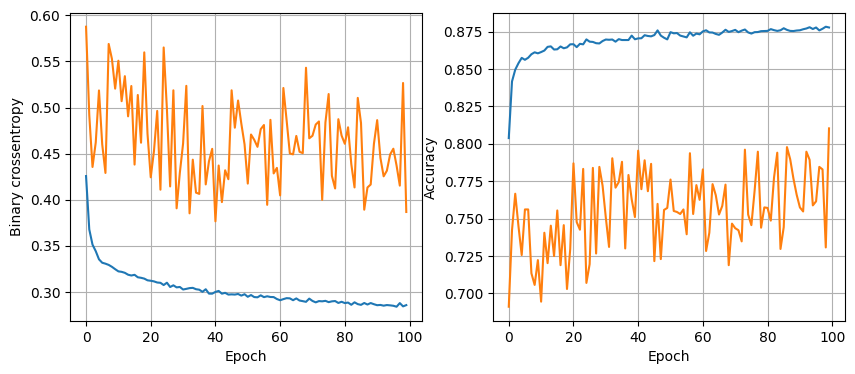

119/119 [==============================] - 0s 1ms/step - loss: 0.3062 - accuracy: 0.8696
16 nodes, dropout 0, lr 0.005, batch size 64


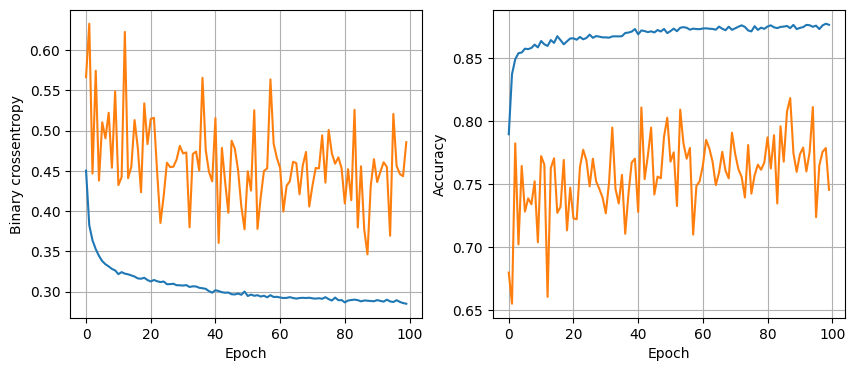

119/119 [==============================] - 0s 2ms/step - loss: 0.3120 - accuracy: 0.8699
16 nodes, dropout 0, lr 0.005, batch size 128


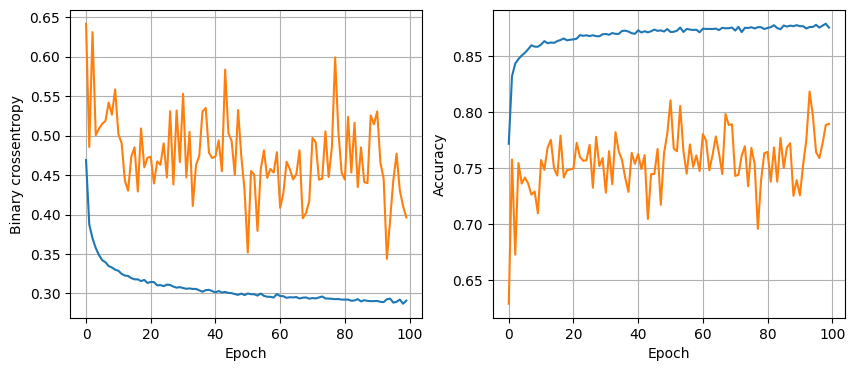

119/119 [==============================] - 0s 1ms/step - loss: 0.3154 - accuracy: 0.8722
16 nodes, dropout 0, lr 0.001, batch size 32


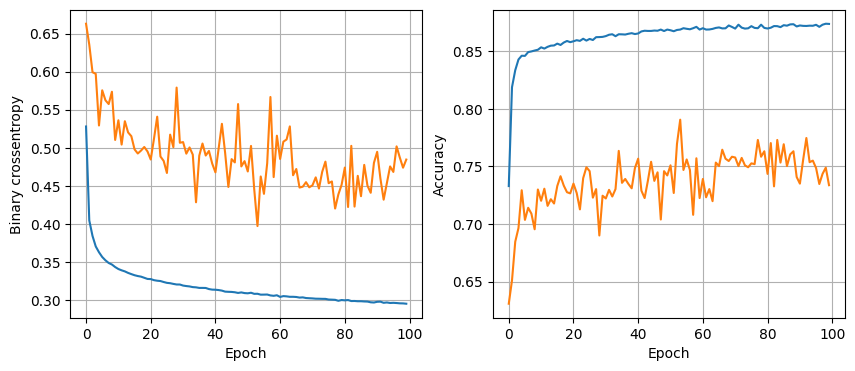

119/119 [==============================] - 0s 2ms/step - loss: 0.2931 - accuracy: 0.8778
16 nodes, dropout 0, lr 0.001, batch size 64


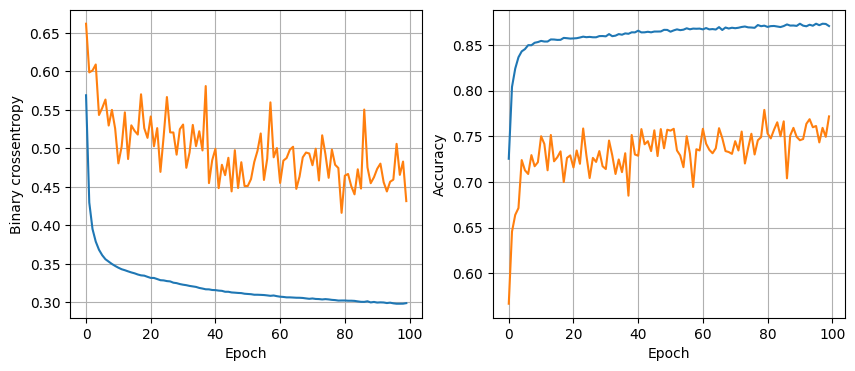

119/119 [==============================] - 0s 1ms/step - loss: 0.2940 - accuracy: 0.8814
16 nodes, dropout 0, lr 0.001, batch size 128


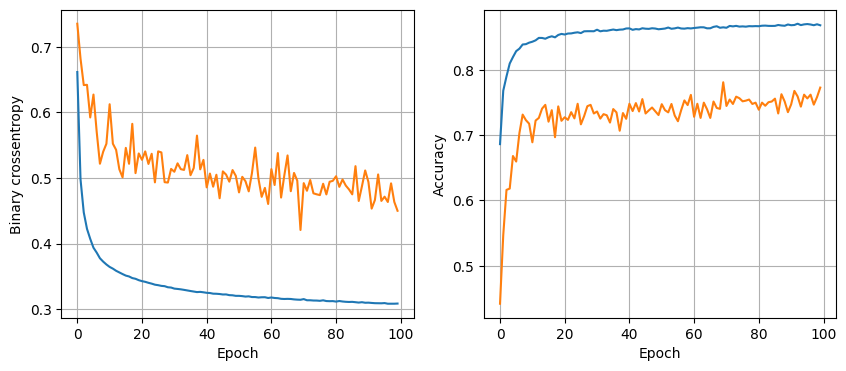

119/119 [==============================] - 0s 1ms/step - loss: 0.2963 - accuracy: 0.8736
16 nodes, dropout 0.2, lr 0.1, batch size 32


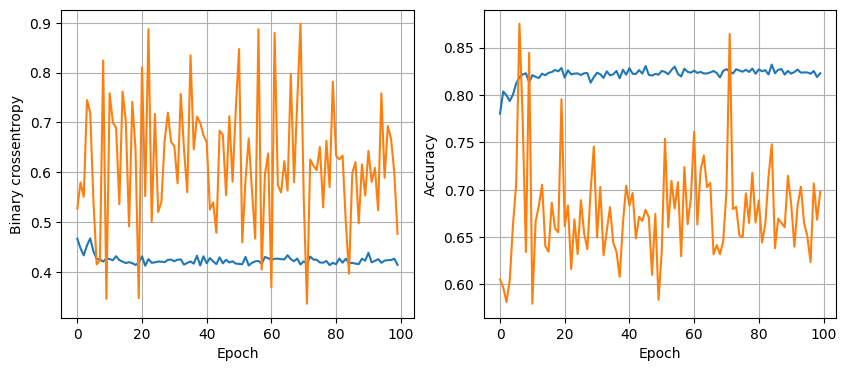

119/119 [==============================] - 0s 2ms/step - loss: 0.3748 - accuracy: 0.8575
16 nodes, dropout 0.2, lr 0.1, batch size 64


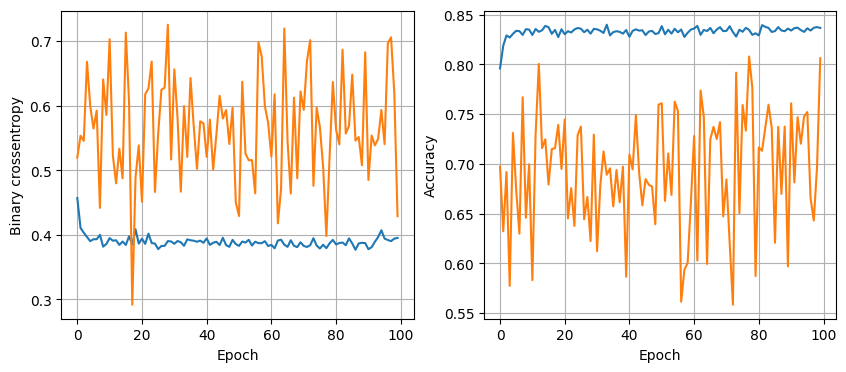

119/119 [==============================] - 0s 1ms/step - loss: 0.3819 - accuracy: 0.8530
16 nodes, dropout 0.2, lr 0.1, batch size 128


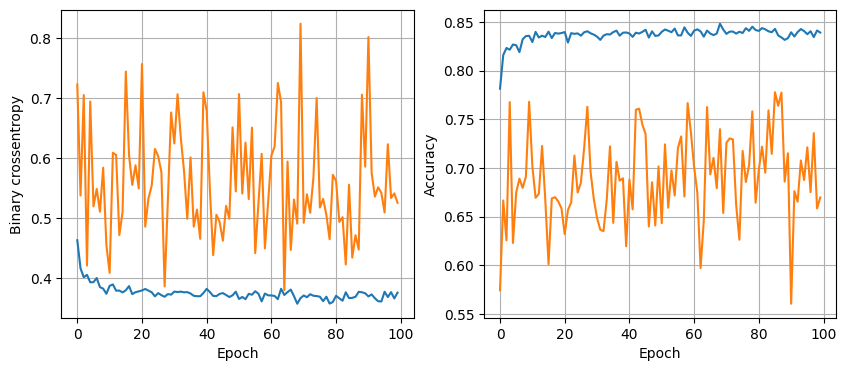

119/119 [==============================] - 0s 1ms/step - loss: 0.3274 - accuracy: 0.8691
16 nodes, dropout 0.2, lr 0.005, batch size 32


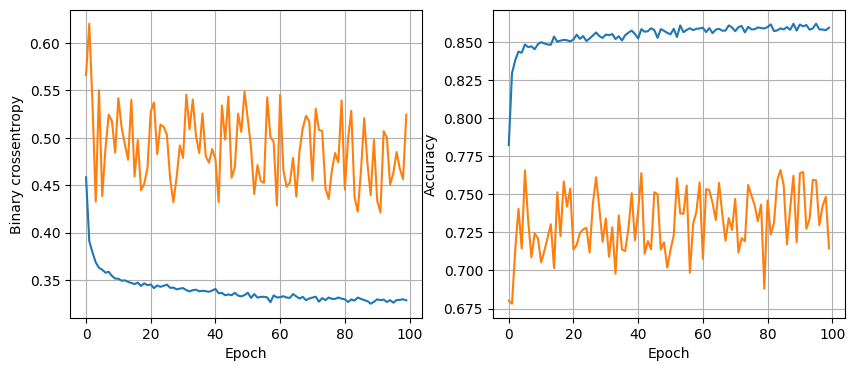

119/119 [==============================] - 0s 3ms/step - loss: 0.2956 - accuracy: 0.8807
16 nodes, dropout 0.2, lr 0.005, batch size 64


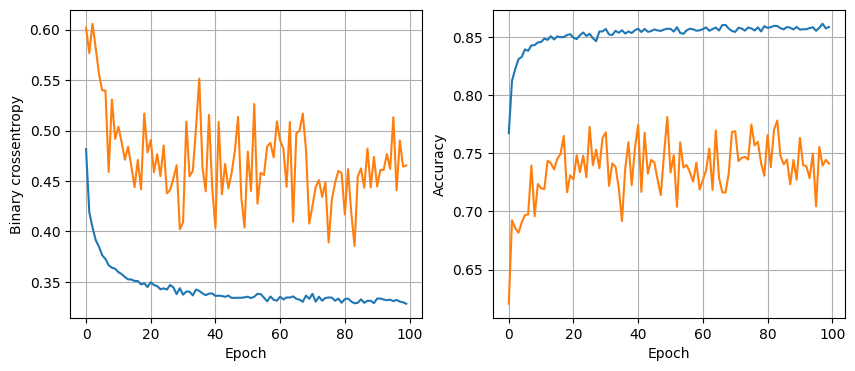

119/119 [==============================] - 0s 2ms/step - loss: 0.2964 - accuracy: 0.8825
16 nodes, dropout 0.2, lr 0.005, batch size 128


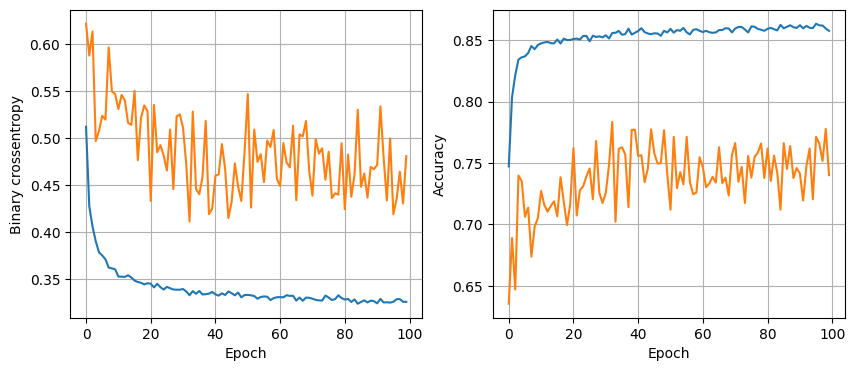

119/119 [==============================] - 0s 2ms/step - loss: 0.2974 - accuracy: 0.8762
16 nodes, dropout 0.2, lr 0.001, batch size 32


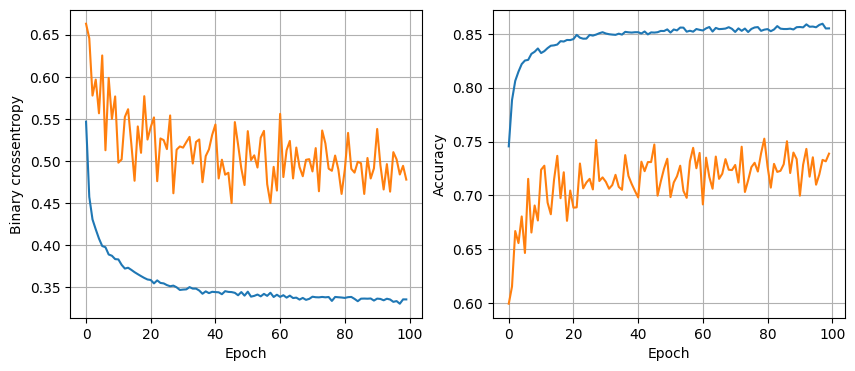

119/119 [==============================] - 0s 1ms/step - loss: 0.2997 - accuracy: 0.8762
16 nodes, dropout 0.2, lr 0.001, batch size 64


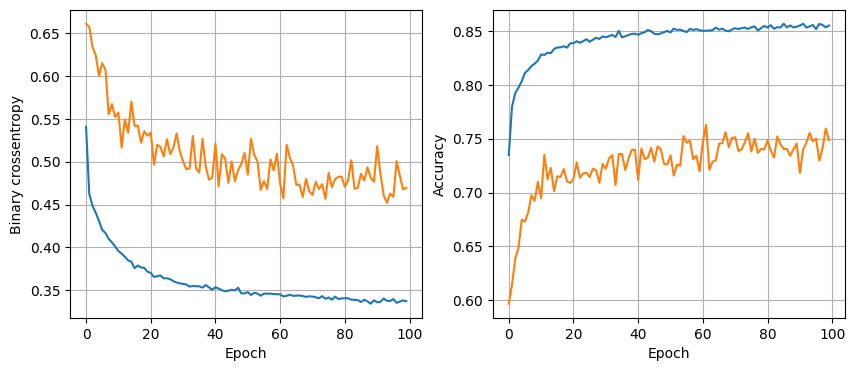

119/119 [==============================] - 0s 1ms/step - loss: 0.2979 - accuracy: 0.8764
16 nodes, dropout 0.2, lr 0.001, batch size 128


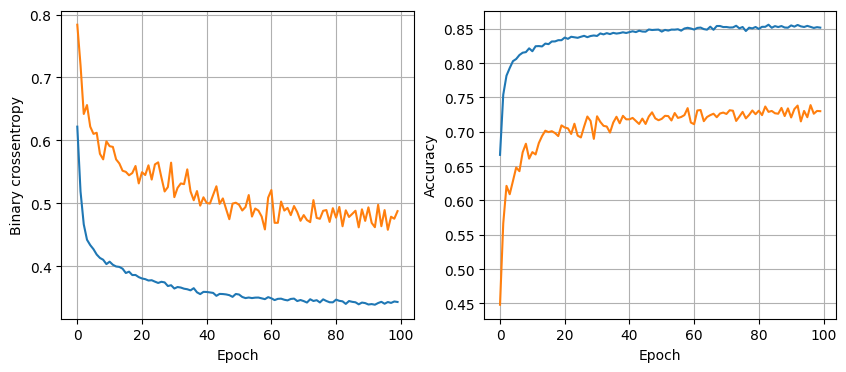

119/119 [==============================] - 0s 2ms/step - loss: 0.3066 - accuracy: 0.8741
32 nodes, dropout 0, lr 0.1, batch size 32


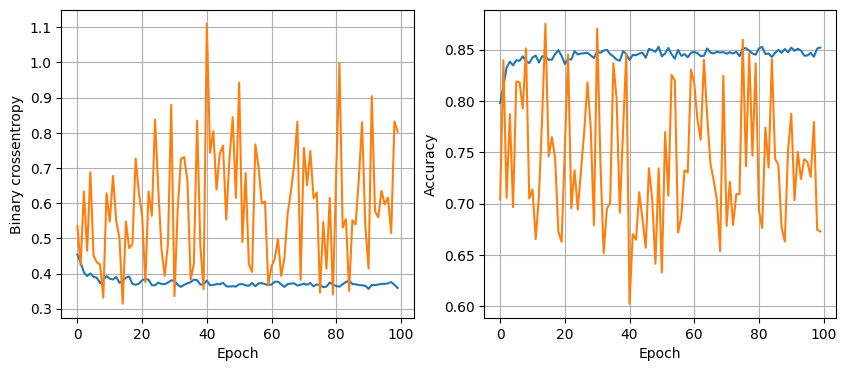

119/119 [==============================] - 0s 1ms/step - loss: 0.3415 - accuracy: 0.8638
32 nodes, dropout 0, lr 0.1, batch size 64


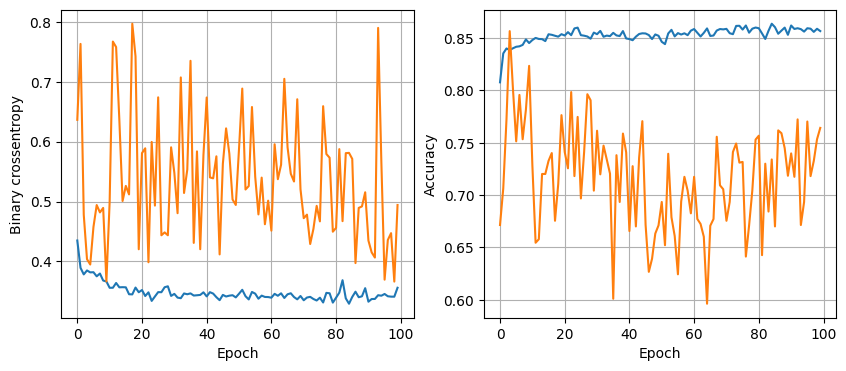

119/119 [==============================] - 0s 1ms/step - loss: 0.3429 - accuracy: 0.8683
32 nodes, dropout 0, lr 0.1, batch size 128


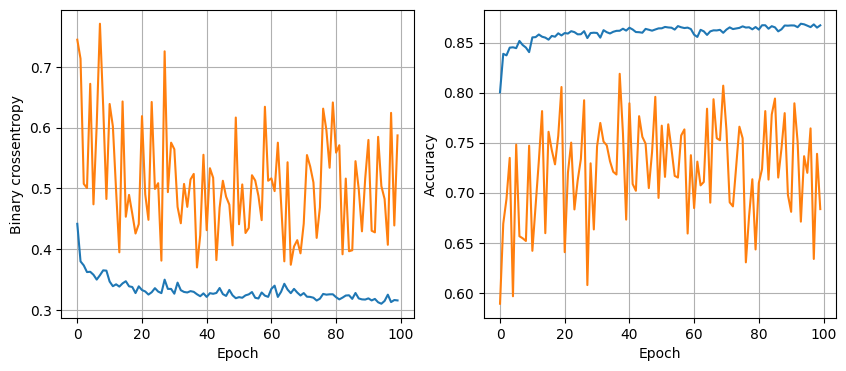

119/119 [==============================] - 0s 2ms/step - loss: 0.3128 - accuracy: 0.8722
32 nodes, dropout 0, lr 0.005, batch size 32


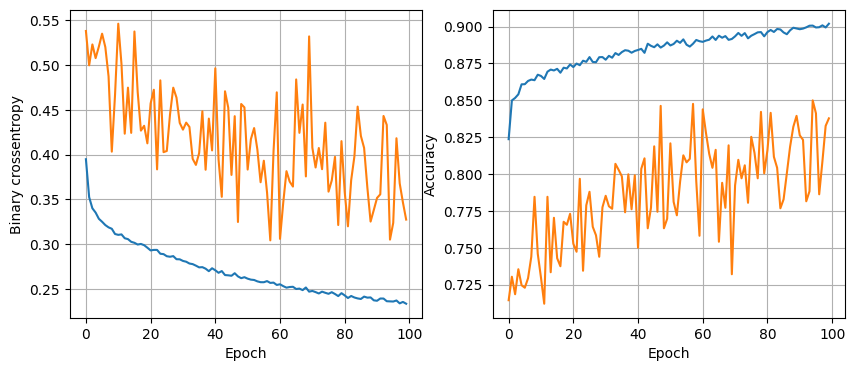

119/119 [==============================] - 0s 2ms/step - loss: 0.3575 - accuracy: 0.8641
32 nodes, dropout 0, lr 0.005, batch size 64


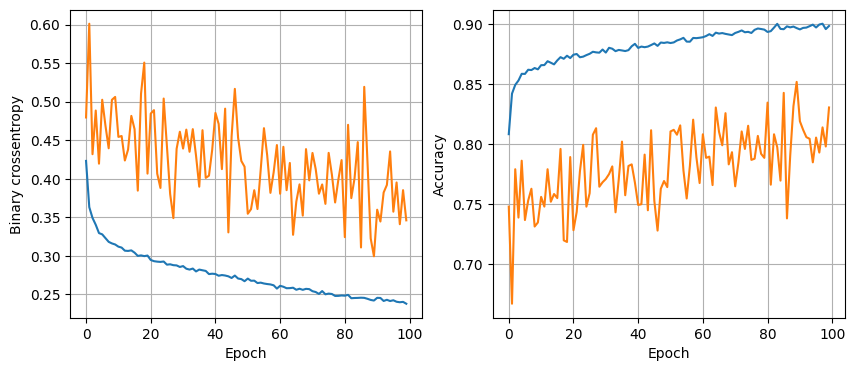

119/119 [==============================] - 0s 2ms/step - loss: 0.3576 - accuracy: 0.8662
32 nodes, dropout 0, lr 0.005, batch size 128


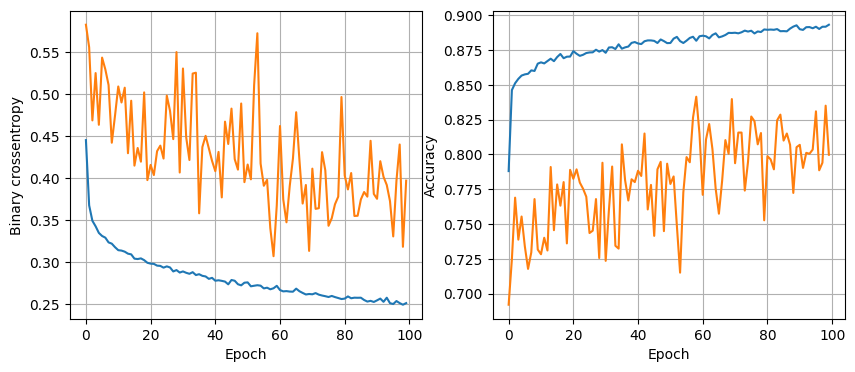

119/119 [==============================] - 0s 2ms/step - loss: 0.3390 - accuracy: 0.8651
32 nodes, dropout 0, lr 0.001, batch size 32


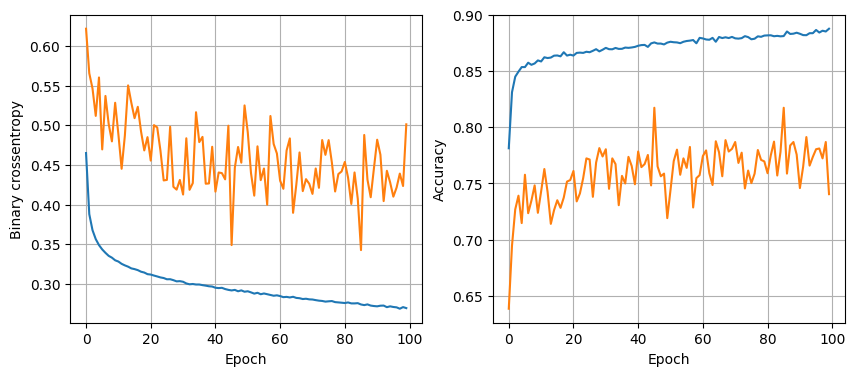

119/119 [==============================] - 0s 2ms/step - loss: 0.2960 - accuracy: 0.8817
32 nodes, dropout 0, lr 0.001, batch size 64


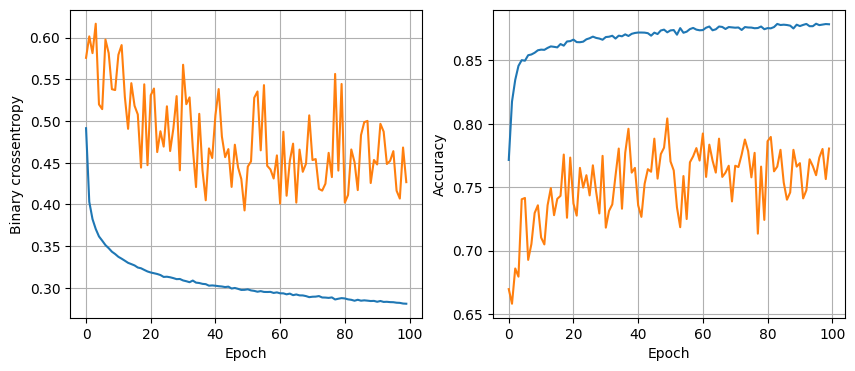

119/119 [==============================] - 0s 1ms/step - loss: 0.2917 - accuracy: 0.8812
32 nodes, dropout 0, lr 0.001, batch size 128


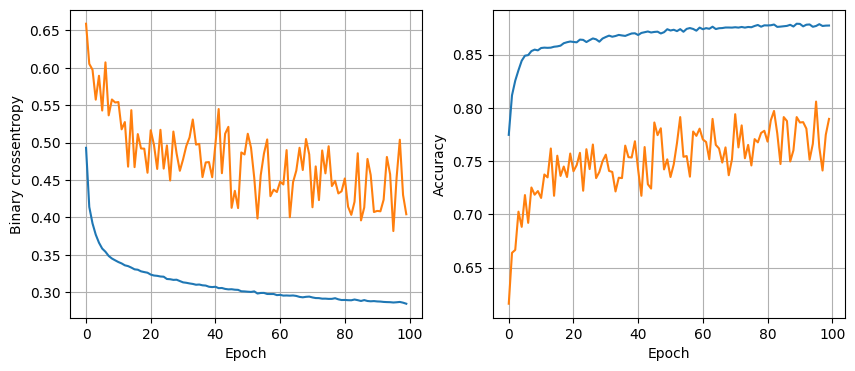

119/119 [==============================] - 0s 2ms/step - loss: 0.2958 - accuracy: 0.8741
32 nodes, dropout 0.2, lr 0.1, batch size 32


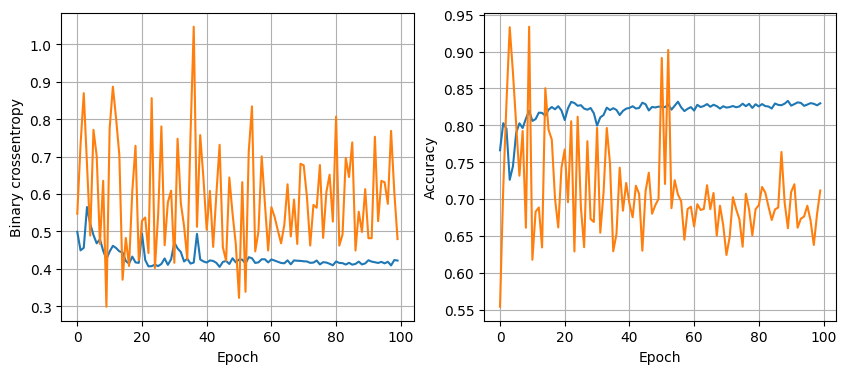

119/119 [==============================] - 0s 2ms/step - loss: 0.3644 - accuracy: 0.8559
32 nodes, dropout 0.2, lr 0.1, batch size 64


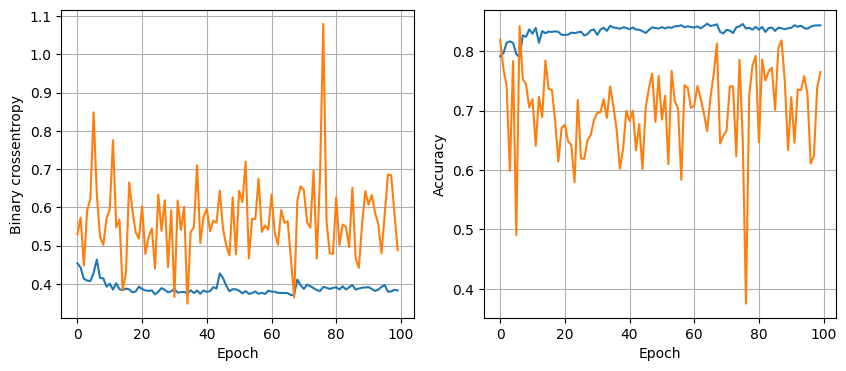

119/119 [==============================] - 0s 2ms/step - loss: 0.3404 - accuracy: 0.8749
32 nodes, dropout 0.2, lr 0.1, batch size 128


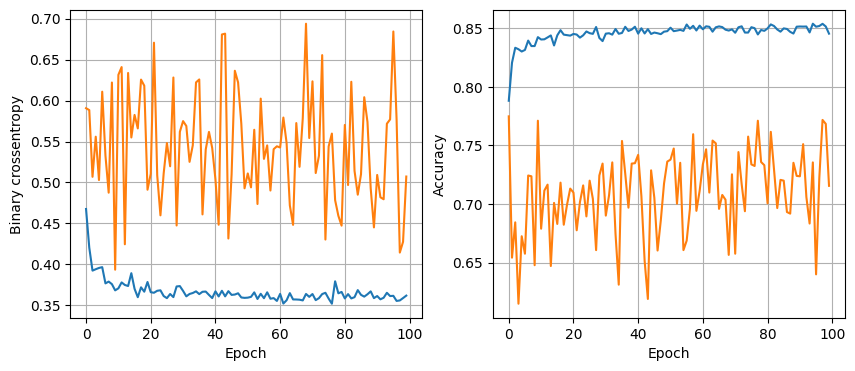

119/119 [==============================] - 0s 2ms/step - loss: 0.3150 - accuracy: 0.8785
32 nodes, dropout 0.2, lr 0.005, batch size 32


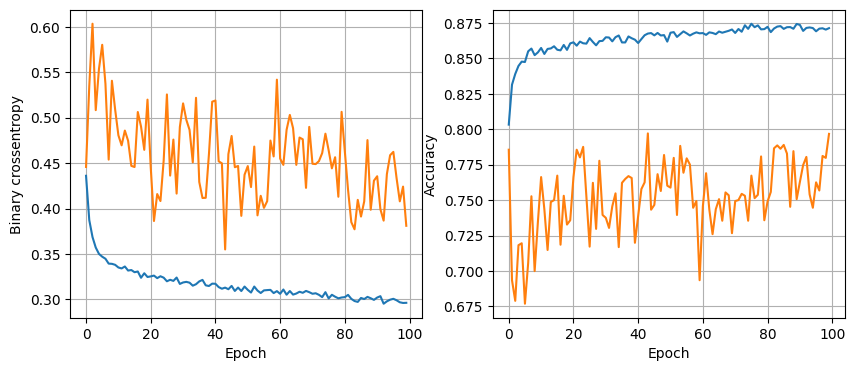

119/119 [==============================] - 0s 2ms/step - loss: 0.2894 - accuracy: 0.8775
32 nodes, dropout 0.2, lr 0.005, batch size 64


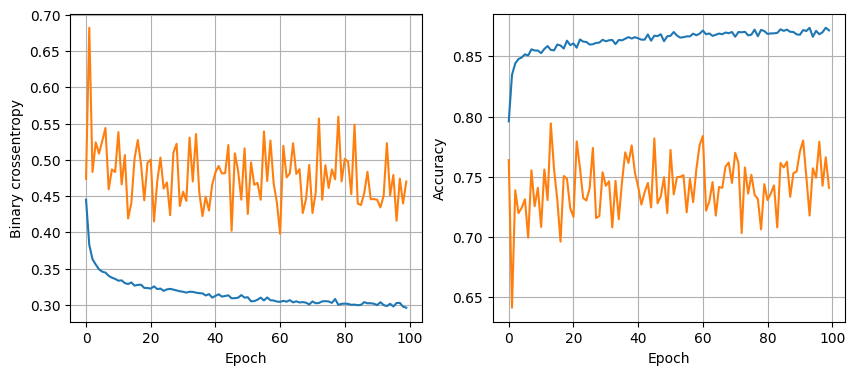

119/119 [==============================] - 0s 1ms/step - loss: 0.2827 - accuracy: 0.8780
32 nodes, dropout 0.2, lr 0.005, batch size 128


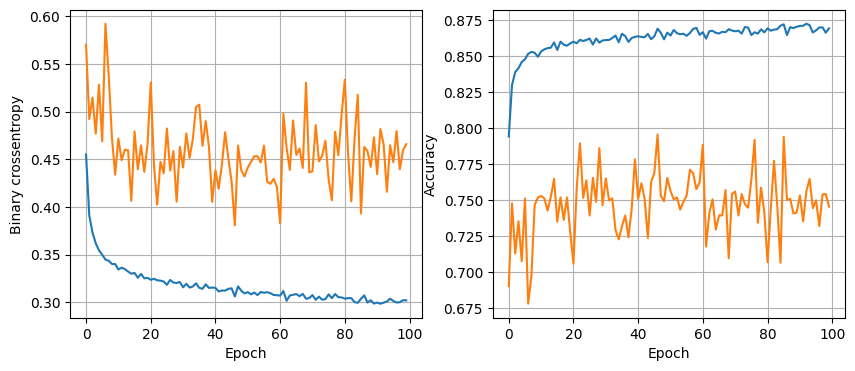

119/119 [==============================] - 0s 1ms/step - loss: 0.2961 - accuracy: 0.8757
32 nodes, dropout 0.2, lr 0.001, batch size 32


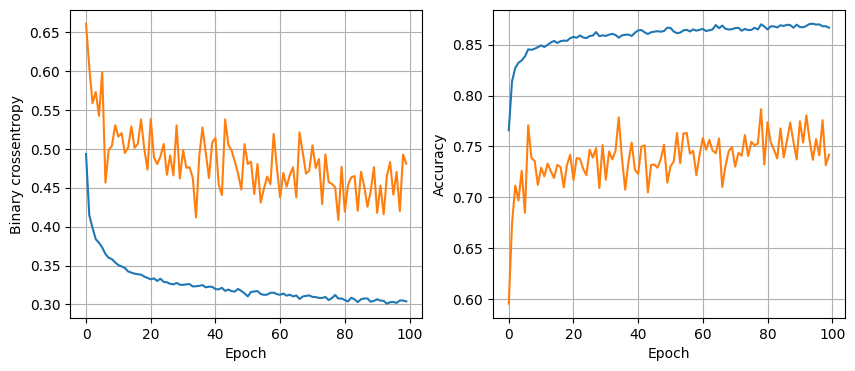

119/119 [==============================] - 0s 2ms/step - loss: 0.2847 - accuracy: 0.8796
32 nodes, dropout 0.2, lr 0.001, batch size 64


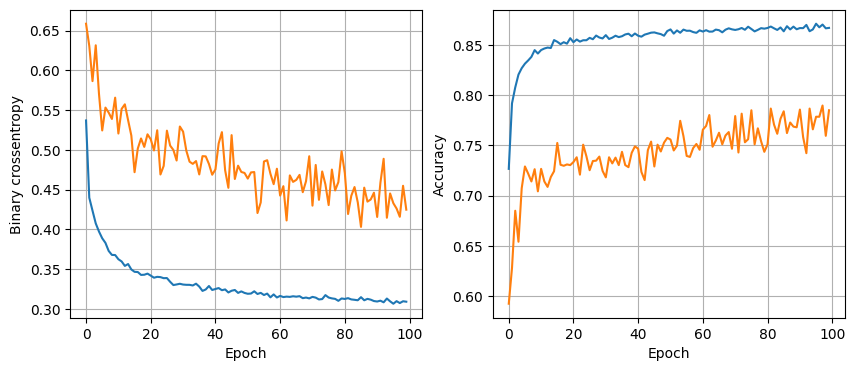

119/119 [==============================] - 0s 2ms/step - loss: 0.2910 - accuracy: 0.8788
32 nodes, dropout 0.2, lr 0.001, batch size 128


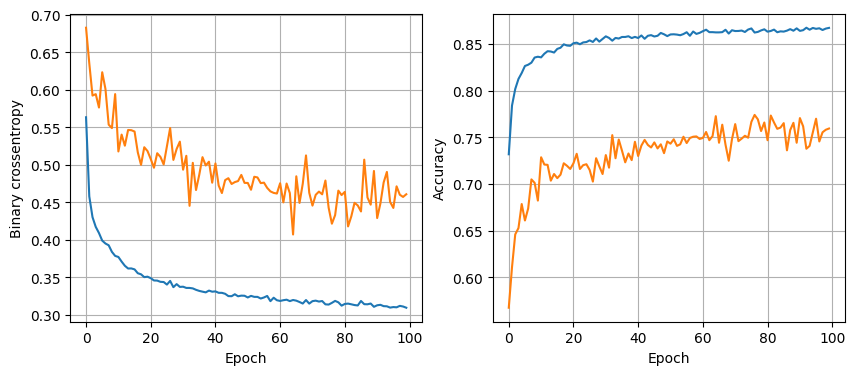

119/119 [==============================] - 0s 1ms/step - loss: 0.2854 - accuracy: 0.8788
64 nodes, dropout 0, lr 0.1, batch size 32


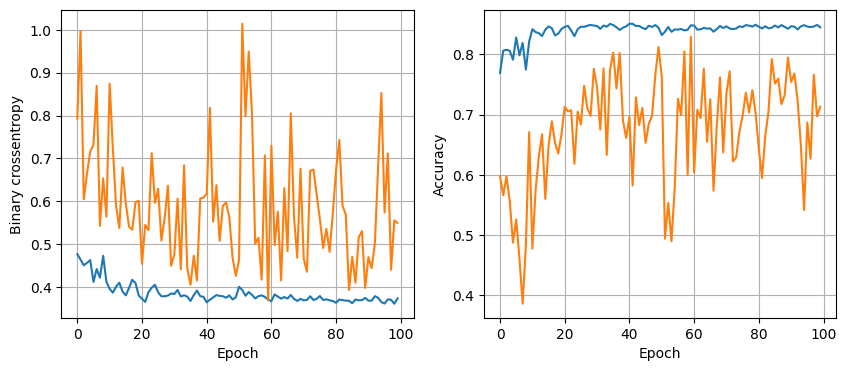

119/119 [==============================] - 0s 2ms/step - loss: 0.3394 - accuracy: 0.8683
64 nodes, dropout 0, lr 0.1, batch size 64


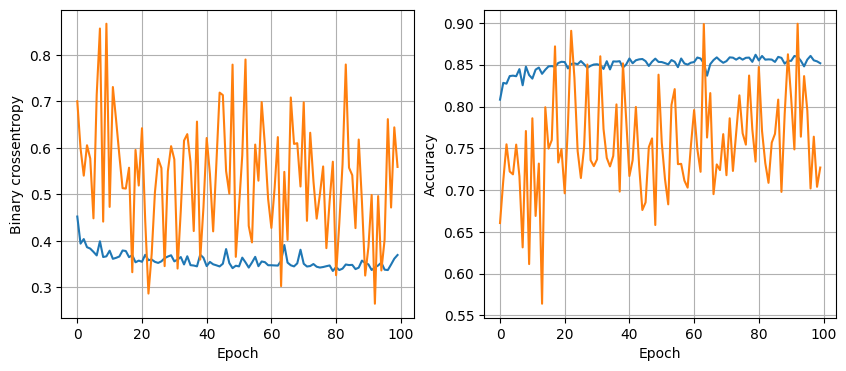

119/119 [==============================] - 0s 2ms/step - loss: 0.3102 - accuracy: 0.8746
64 nodes, dropout 0, lr 0.1, batch size 128


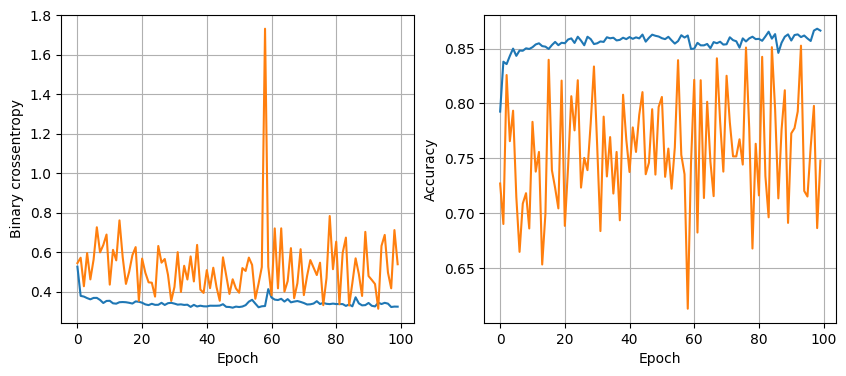

119/119 [==============================] - 0s 2ms/step - loss: 0.3031 - accuracy: 0.8785
64 nodes, dropout 0, lr 0.005, batch size 32


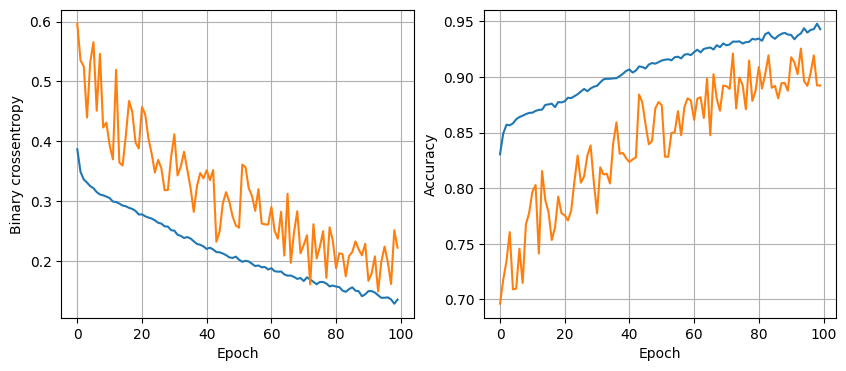

119/119 [==============================] - 0s 1ms/step - loss: 0.5712 - accuracy: 0.8583
64 nodes, dropout 0, lr 0.005, batch size 64


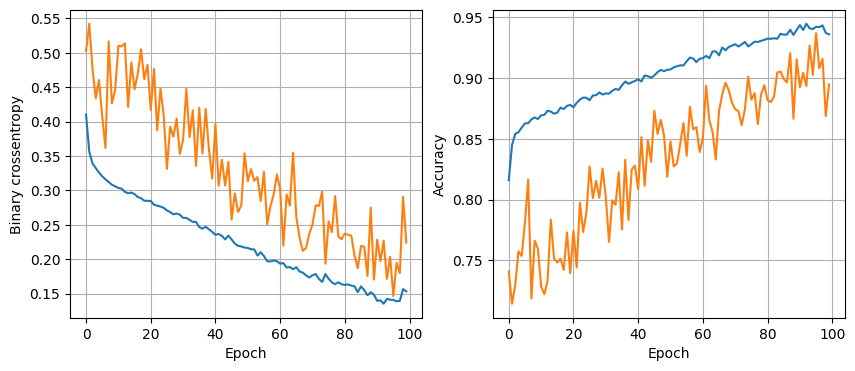

119/119 [==============================] - 0s 2ms/step - loss: 0.4879 - accuracy: 0.8625
64 nodes, dropout 0, lr 0.005, batch size 128


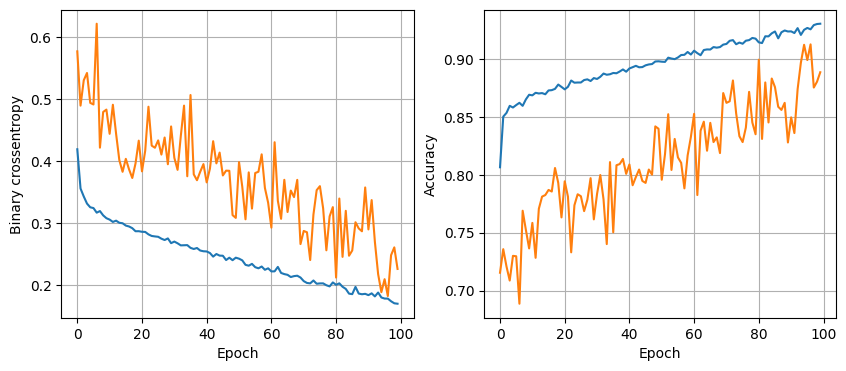

119/119 [==============================] - 0s 2ms/step - loss: 0.4292 - accuracy: 0.8583
64 nodes, dropout 0, lr 0.001, batch size 32


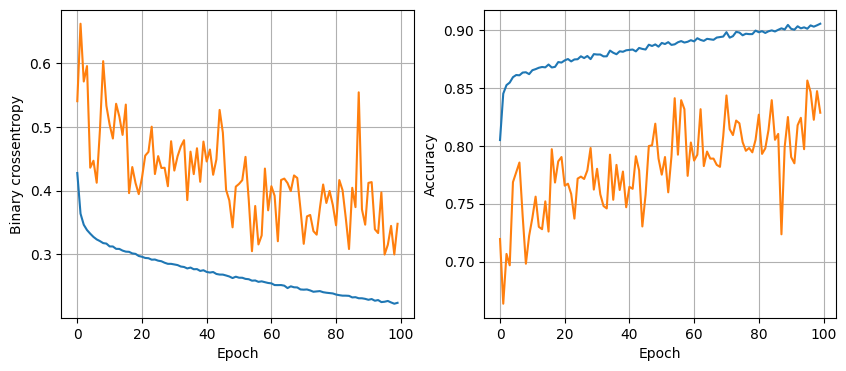

119/119 [==============================] - 0s 2ms/step - loss: 0.3208 - accuracy: 0.8730
64 nodes, dropout 0, lr 0.001, batch size 64


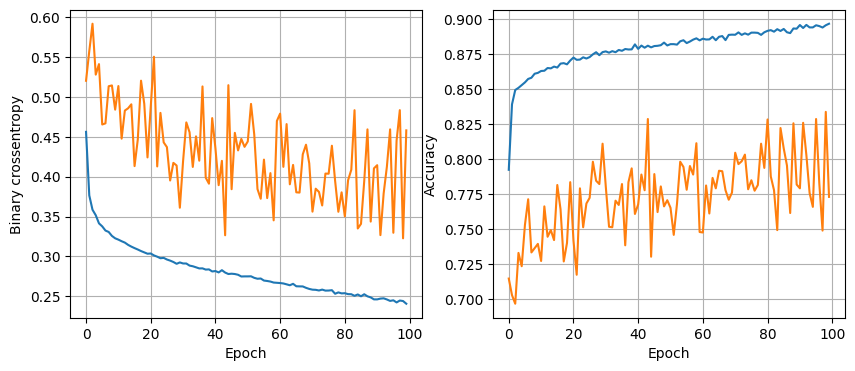

119/119 [==============================] - 0s 2ms/step - loss: 0.3133 - accuracy: 0.8783
64 nodes, dropout 0, lr 0.001, batch size 128


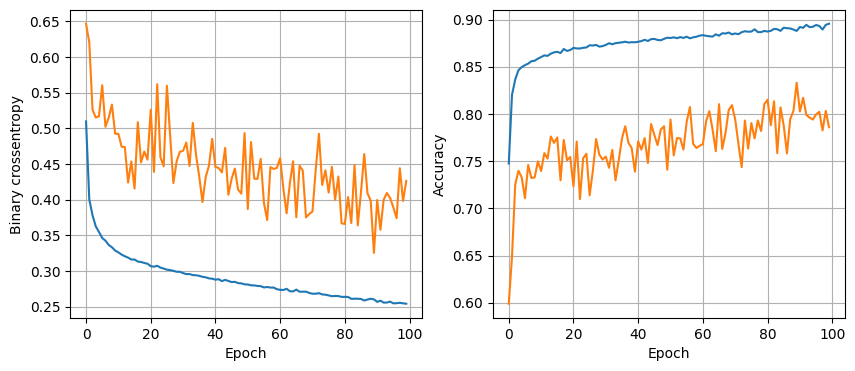

119/119 [==============================] - 0s 2ms/step - loss: 0.3008 - accuracy: 0.8772
64 nodes, dropout 0.2, lr 0.1, batch size 32


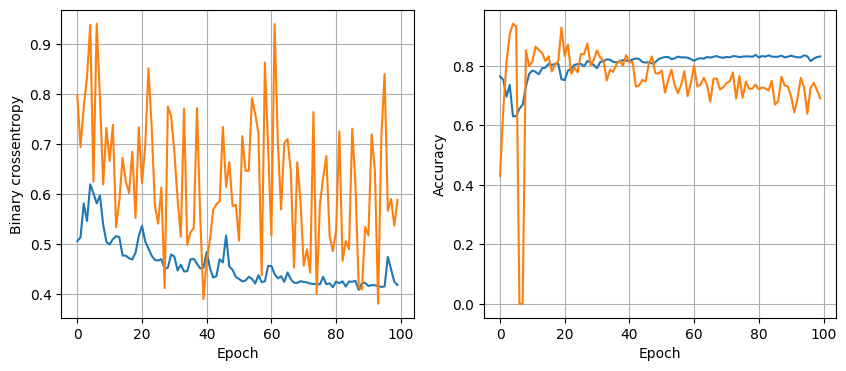

119/119 [==============================] - 0s 2ms/step - loss: 0.3688 - accuracy: 0.8533
64 nodes, dropout 0.2, lr 0.1, batch size 64


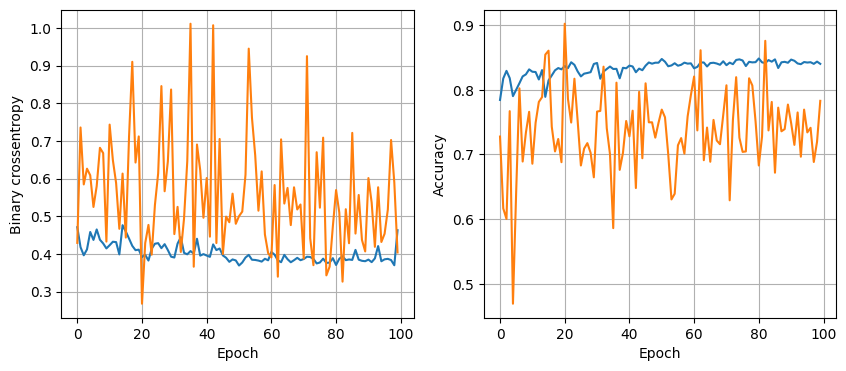

119/119 [==============================] - 0s 2ms/step - loss: 0.3542 - accuracy: 0.8594
64 nodes, dropout 0.2, lr 0.1, batch size 128


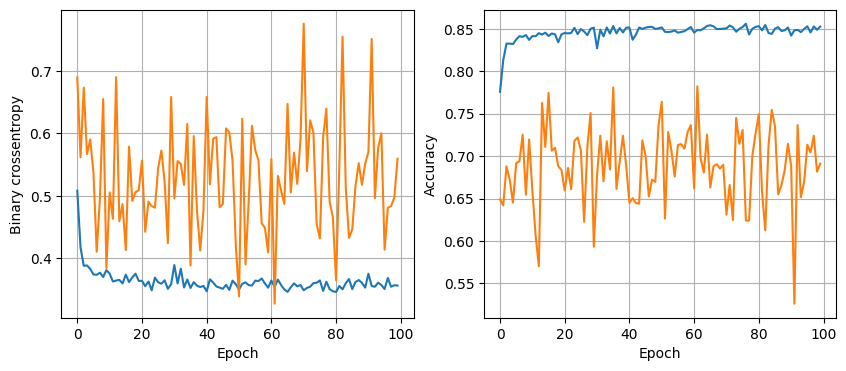

119/119 [==============================] - 0s 2ms/step - loss: 0.3120 - accuracy: 0.8696
64 nodes, dropout 0.2, lr 0.005, batch size 32


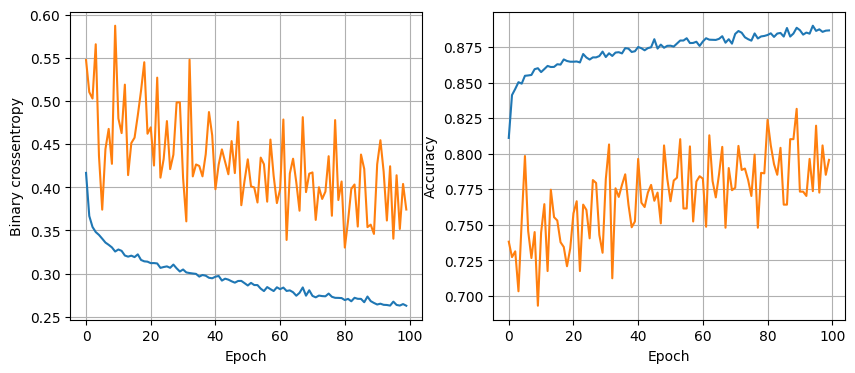

119/119 [==============================] - 0s 2ms/step - loss: 0.2976 - accuracy: 0.8751
64 nodes, dropout 0.2, lr 0.005, batch size 64


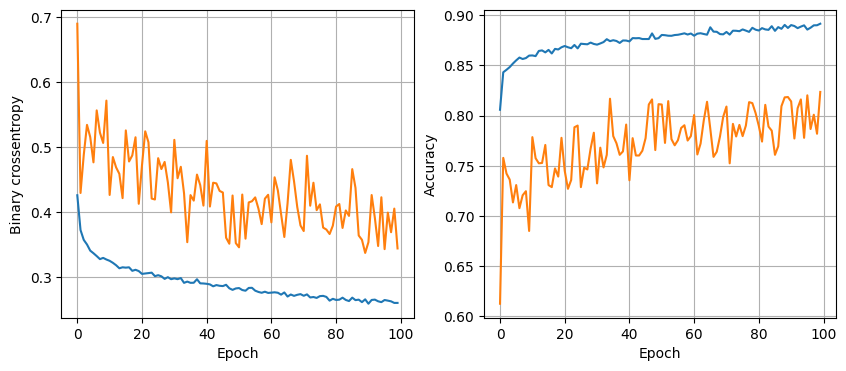

119/119 [==============================] - 0s 2ms/step - loss: 0.2897 - accuracy: 0.8814
64 nodes, dropout 0.2, lr 0.005, batch size 128


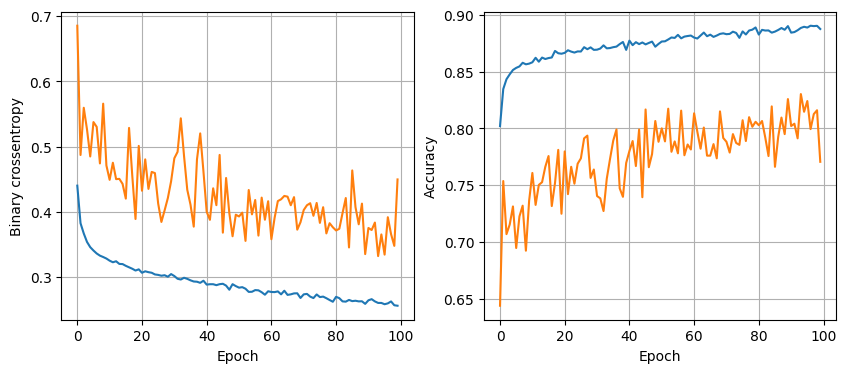

119/119 [==============================] - 0s 2ms/step - loss: 0.2949 - accuracy: 0.8780
64 nodes, dropout 0.2, lr 0.001, batch size 32


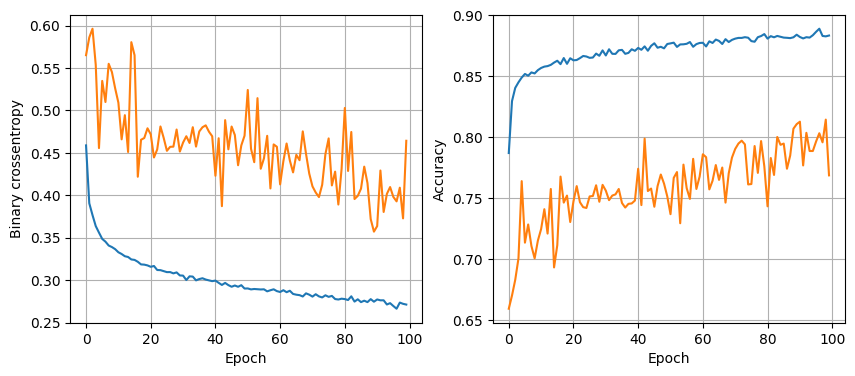

119/119 [==============================] - 0s 2ms/step - loss: 0.2892 - accuracy: 0.8807
64 nodes, dropout 0.2, lr 0.001, batch size 64


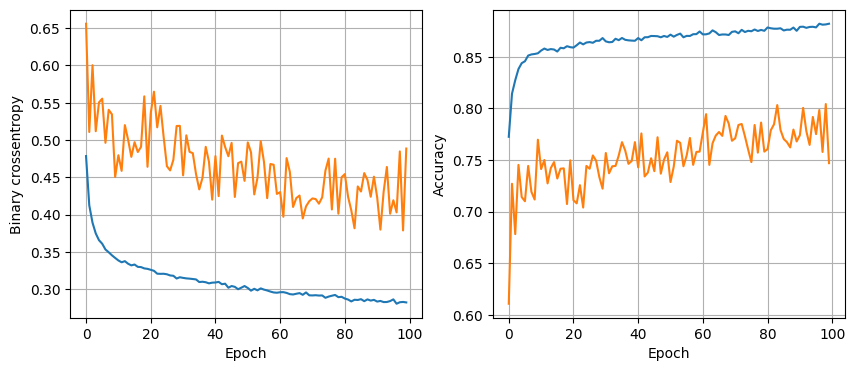

119/119 [==============================] - 0s 1ms/step - loss: 0.2872 - accuracy: 0.8780
64 nodes, dropout 0.2, lr 0.001, batch size 128


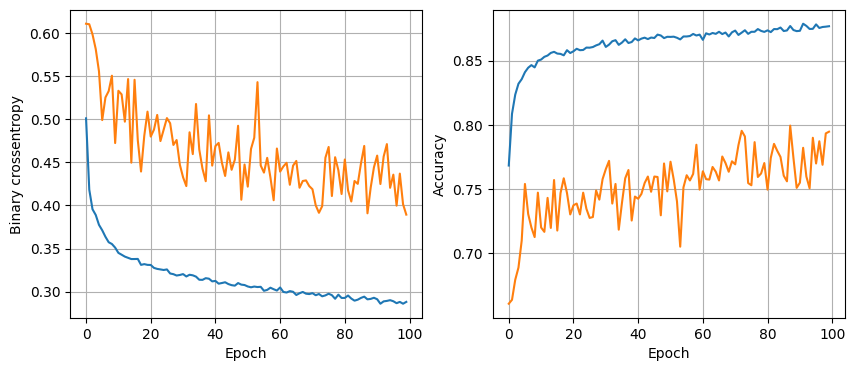

119/119 [==============================] - 0s 2ms/step - loss: 0.2860 - accuracy: 0.8825


In [70]:
least_val_loss = float('inf')
least_loss_model = None
epochs = 100
for num_nodes in [16,32,64]:
  for dropout_prob in [0,0.2]:
    for lr in [0.1,0.005, 0.001]:
      for batch_size in [32,64,128]:
        print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch size {batch_size}")
        model, history = train_model(X_train, y_train,num_nodes, dropout_prob, lr, batch_size, epochs)
        plot_history(history)
        val_loss = model.evaluate(X_valid, y_valid)[0]
        if val_loss < least_val_loss:
          least_val_loss = val_loss
          least_loss_model = model

In [75]:
y_pred = least_loss_model.predict(X_test)
y_pred = (y_pred>0.5).astype(int).reshape(-1) #.reshape transform the colonne into a line
y_pred

119/119 [==============================] - 0s 1ms/step


array([0, 0, 0, ..., 1, 1, 1])

In [77]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.75      0.81      1324
           1       0.87      0.94      0.91      2480

    accuracy                           0.88      3804
   macro avg       0.88      0.85      0.86      3804
weighted avg       0.88      0.88      0.87      3804

